# Task No - 4 
##  Classification with Logistic Regression.

## Breast Cancer Wincosin Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [24]:
# Load the dataset
data = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/-/Elevate Labs Internship/Project - 3/data.csv")

In [27]:
# Drop unnecessary columns
data = data.drop(columns=['id', 'Unnamed: 32'])

In [28]:
# Convert diagnosis to binary (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [29]:
# Separate features and target
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [30]:
# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Sunil Kannur\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Sunil Kannur\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Sunil Kannur\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [32]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

C:\Users\Sunil Kannur\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
# Predict on test set
y_pred = logreg.predict(X_test)

In [35]:
# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[70  1]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1000x800 with 0 Axes>

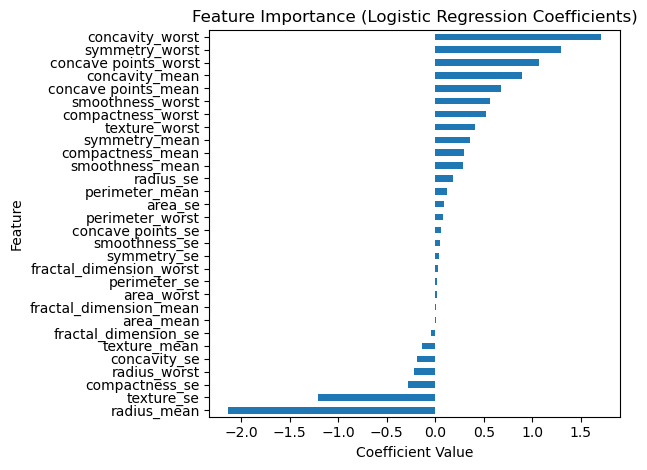

In [36]:
# Plot feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
coefficients.sort_values('Coefficient').plot.barh(x='Feature', y='Coefficient', legend=False)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()